## Milestone 2 - Flat File (CSV)

#### Importing Packages

In [1]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Exploring the data

In [2]:
# Loads and saves the data
carbon_csv = pd.read_csv("Agrofood_co2_emission.csv")
print(carbon_csv.head(1))

          Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0             686.0                          0.0                 11.807483   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0                 NaN           9655167   

   Urban population  Total Population - Male  Total Population - Female  \
0           2593947                5348387.0                  5346409.0   

   total_emission  Average_Temperature  
0     2198.963539             0.536167  

[1 rows x 31 columns]


In [3]:
# Checks the number of rows and columns
print("The dataframe has {} rows and {} columns".format(*carbon_csv.shape))

The dataframe has 6965 rows and 31 columns


In [4]:
# Prints the column headers
print(pd.Series(carbon_csv.columns))

0                                Area
1                                Year
2                       Savanna fires
3                        Forest fires
4                       Crop Residues
5                    Rice Cultivation
6         Drained organic soils (CO2)
7            Pesticides Manufacturing
8                      Food Transport
9                          Forestland
10              Net Forest conversion
11         Food Household Consumption
12                        Food Retail
13            On-farm Electricity Use
14                     Food Packaging
15    Agrifood Systems Waste Disposal
16                    Food Processing
17          Fertilizers Manufacturing
18                               IPPU
19            Manure applied to Soils
20             Manure left on Pasture
21                  Manure Management
22             Fires in organic soils
23    Fires in humid tropical forests
24                 On-farm energy use
25                   Rural population
26          

In [5]:
# Checks for missing values in any column
missing = carbon_csv.isna().any()
print("Columns with missing data:\n", missing)

Columns with missing data:
 Area                               False
Year                               False
Savanna fires                       True
Forest fires                        True
Crop Residues                       True
Rice Cultivation                   False
Drained organic soils (CO2)        False
Pesticides Manufacturing           False
Food Transport                     False
Forestland                          True
Net Forest conversion               True
Food Household Consumption          True
Food Retail                        False
On-farm Electricity Use            False
Food Packaging                     False
Agrifood Systems Waste Disposal    False
Food Processing                    False
Fertilizers Manufacturing          False
IPPU                                True
Manure applied to Soils             True
Manure left on Pasture             False
Manure Management                   True
Fires in organic soils             False
Fires in humid tropical fores

According to the metadata, Rural Population and Urban Population are the number of people living in each respectively. The Total Population - Male and Total Population - Female are the number of males and females in the population. The numbers should equal each other.  

In [6]:
# Checks whether the population columns equal each other
rural_pop = carbon_csv['Rural population'] + carbon_csv['Urban population']
gender_pop = carbon_csv['Total Population - Male'] + carbon_csv['Total Population - Female']
rural_pop == gender_pop
count = (rural_pop == gender_pop).sum()
print("Number of times Rural + Urban populations equal Male + Female populations:", count)

Number of times Rural + Urban populations equal Male + Female populations: 0


### Transformation 1: Headers

For more consistency across the three datasets, I am replacing the header 'Area' with 'Country'. It is possible that not all of the entries are actual countries, but it will make the data more useable in the future.

In [7]:
carbon_csv = carbon_csv.rename(columns = {'Area': 'Country'})
print(pd.Series(carbon_csv.columns))

0                             Country
1                                Year
2                       Savanna fires
3                        Forest fires
4                       Crop Residues
5                    Rice Cultivation
6         Drained organic soils (CO2)
7            Pesticides Manufacturing
8                      Food Transport
9                          Forestland
10              Net Forest conversion
11         Food Household Consumption
12                        Food Retail
13            On-farm Electricity Use
14                     Food Packaging
15    Agrifood Systems Waste Disposal
16                    Food Processing
17          Fertilizers Manufacturing
18                               IPPU
19            Manure applied to Soils
20             Manure left on Pasture
21                  Manure Management
22             Fires in organic soils
23    Fires in humid tropical forests
24                 On-farm energy use
25                   Rural population
26          

The naming structure for the headers is inconsistent. I will replace current delimiters with _ for easier coding use and capitalize the beginning of each word for better readability.

In [8]:
# Converts the headers to a list
headers_old = carbon_csv.columns.tolist()

In [9]:
# Function to find all delimiters
def find_unique_delimiters(strings):
    # Empty set that will store delimiters
    uniqe_delimiters = set()
    
    # Iterates over each string
    for string in strings:
        # Iterates over each character in a string
        for char in string:
            # Checks if the character is a letter or number
            if not char.isalnum():
                # Adds the character to the set
                uniqe_delimiters.add(char)
    return list(uniqe_delimiters)

delimiters = find_unique_delimiters(headers_old)

print("Unique delimiters: ", delimiters)

Unique delimiters:  [')', ' ', '(', '_', '-']


In [10]:
# Function to find the headers where the delimiter isn't a space
def non_space_delimiters(strings):
    non_space_delimiters = []
    
    for string in strings:
        for char in string:
            # Checks whether the delimiter is not a space, letter or number
            if not char.isspace() and not char.isalnum():
                non_space_delimiters.append(char)
                print(f"Header: {string}, Delimiter: {char}")
                
    return non_space_delimiters
                
delimiter_fix = non_space_delimiters(headers_old)

Header: Drained organic soils (CO2), Delimiter: (
Header: Drained organic soils (CO2), Delimiter: )
Header: On-farm Electricity Use, Delimiter: -
Header: On-farm energy use, Delimiter: -
Header: Total Population - Male, Delimiter: -
Header: Total Population - Female, Delimiter: -
Header: total_emission, Delimiter: _
Header: Average_Temperature, Delimiter: _


In [11]:
# Creates a dictionary of the current  headers and their replacements
replacements = {
    "Drained organic soils (CO2)": "Drained organic soils CO2",
    "On-farm Electricity Use": "On farm Electricity Use",
    "On-farm energy use": "On farm energy use",
    "Total Population - Male": "Total Population Male",
    "Total Population - Female": "Total Population Female",
    "total_emission": "total emissions",
    "Average_Temperature": "Average Temperature"
}

In [12]:
# Replaces the current headers with their replacments
carbon_csv = carbon_csv.rename(columns = (replacements))

headers = pd.Series(carbon_csv.columns)

In [13]:
# Capitalizes each word and replaces the space with _
final_headers = pd.Series("_".join(word.capitalize() for word in col.split())
                         for col in carbon_csv.columns)

In [14]:
# Replaces the headers with the updated versions
carbon_csv.columns = final_headers
print(pd.Series(carbon_csv.columns))

0                             Country
1                                Year
2                       Savanna_Fires
3                        Forest_Fires
4                       Crop_Residues
5                    Rice_Cultivation
6           Drained_Organic_Soils_Co2
7            Pesticides_Manufacturing
8                      Food_Transport
9                          Forestland
10              Net_Forest_Conversion
11         Food_Household_Consumption
12                        Food_Retail
13            On_Farm_Electricity_Use
14                     Food_Packaging
15    Agrifood_Systems_Waste_Disposal
16                    Food_Processing
17          Fertilizers_Manufacturing
18                               Ippu
19            Manure_Applied_To_Soils
20             Manure_Left_On_Pasture
21                  Manure_Management
22             Fires_In_Organic_Soils
23    Fires_In_Humid_Tropical_Forests
24                 On_Farm_Energy_Use
25                   Rural_Population
26          

### Transformation 2: Finding Outliers in the Population Columns

Eventually I will add a Total Population column. To do this I need to decide which two of the population columns to use. I will check each for outliers and bad data first to help my decision.

In [15]:
# Subsets the four columns of interest
subset = carbon_csv[["Rural_Population", "Urban_Population", 
                    "Total_Population_Male", "Total_Population_Female"]]

In [16]:
# Checks each of the columns for values of 0
for column in subset:
    has_zero = (subset[column] == 0).any()
    if has_zero:
        print(f'{column} contains zero.')
    else:
        print(f'{column} does not contain zero.')

Rural_Population contains zero.
Urban_Population contains zero.
Total_Population_Male does not contain zero.
Total_Population_Female does not contain zero.


In [17]:
# Gives summary statistics for each of the columns
print(subset.describe())

       Rural_Population  Urban_Population  Total_Population_Male  \
count      6.965000e+03      6.965000e+03           6.965000e+03   
mean       1.785774e+07      1.693230e+07           1.761963e+07   
std        8.901521e+07      6.574362e+07           7.603993e+07   
min        0.000000e+00      0.000000e+00           2.500000e+02   
25%        9.731100e+04      2.173860e+05           2.013260e+05   
50%        1.595322e+06      2.357581e+06           2.469660e+06   
75%        8.177340e+06      8.277123e+06           9.075924e+06   
max        9.000991e+08      9.020778e+08           7.435866e+08   

       Total_Population_Female  
count             6.965000e+03  
mean              1.732447e+07  
std               7.251711e+07  
min               2.700000e+02  
25%               2.078900e+05  
50%               2.444135e+06  
75%               9.112588e+06  
max               7.133419e+08  


### Transformation 3: Adding a Total Population Column

The current columns for population are not easily comparable to other datasets. I will create a new column for total population so the numbers can be more easily analyzed. I have decided to use the Male & Female columns for this, because Rural and Urban both contained values of 0. It seems unlikely that a country would have a 0 population for either of these values

In [18]:
carbon_csv["Total_Population"] = carbon_csv["Total_Population_Male"] + carbon_csv["Total_Population_Female"]

print(carbon_csv.head(1))

       Country  Year  Savanna_Fires  Forest_Fires  Crop_Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   

   Rice_Cultivation  Drained_Organic_Soils_Co2  Pesticides_Manufacturing  \
0             686.0                        0.0                 11.807483   

   Food_Transport  Forestland  ...  Fires_In_Organic_Soils  \
0         63.1152   -2388.803  ...                     0.0   

   Fires_In_Humid_Tropical_Forests  On_Farm_Energy_Use  Rural_Population  \
0                              0.0                 NaN           9655167   

   Urban_Population  Total_Population_Male  Total_Population_Female  \
0           2593947              5348387.0                5346409.0   

   Total_Emissions  Average_Temperature  Total_Population  
0      2198.963539             0.536167        10694796.0  

[1 rows x 32 columns]


### Transformation 4: Replacing Missing values with NULL

Multiple columns had missing values. I won't remove this columns because there might be valuable information contains in other columns for that row so I will replace the missing values with NULL.

In [19]:
# Fills all missing values with NaN
carbon_csv.fillna(np.nan, inplace = True)

# Checks to ensure missing values were filled in with NaN
print(carbon_csv.head(1))

       Country  Year  Savanna_Fires  Forest_Fires  Crop_Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   

   Rice_Cultivation  Drained_Organic_Soils_Co2  Pesticides_Manufacturing  \
0             686.0                        0.0                 11.807483   

   Food_Transport  Forestland  ...  Fires_In_Organic_Soils  \
0         63.1152   -2388.803  ...                     0.0   

   Fires_In_Humid_Tropical_Forests  On_Farm_Energy_Use  Rural_Population  \
0                              0.0                 NaN           9655167   

   Urban_Population  Total_Population_Male  Total_Population_Female  \
0           2593947              5348387.0                5346409.0   

   Total_Emissions  Average_Temperature  Total_Population  
0      2198.963539             0.536167        10694796.0  

[1 rows x 32 columns]


### Transformation 5: Checking for Outliers in the Total Emissions Column

For the project I plan to compare emissions information across several sources. I will check the emissions columns for outliers to reveal any potentially bad data.

In [20]:
# Prints the summary statistics for the emissions column
print(carbon_csv['Total_Emissions'].describe())

count    6.965000e+03
mean     6.409124e+04
std      2.283130e+05
min     -3.918841e+05
25%      5.221244e+03
50%      1.214765e+04
75%      3.513973e+04
max      3.115114e+06
Name: Total_Emissions, dtype: float64


The minimum value for emissions is negative. According to the metadata, forestland could result in a negative value. For the total emissions to be negative, the forestland value would also have to be negative.

In [21]:
# Creates a subset where both Forestland and Total Emissions 
# values are negative
negative_match = carbon_csv[(carbon_csv["Forestland"] < 0) & (
    carbon_csv["Total_Emissions"] < 0)]

# Checks if the number of rows in the subset aligns with the number of rows
# in Total Emissions that are negative
if negative_match.shape[0] == carbon_csv[carbon_csv["Total_Emissions"] 
                                        < 0].shape[0]:
    print("Where Total Emissions is negative, Forestland is negative.")
else:
    print("Total Emissions is negative, but Forestland is either zero or positive.")

Where Total Emissions is negative, Forestland is negative.


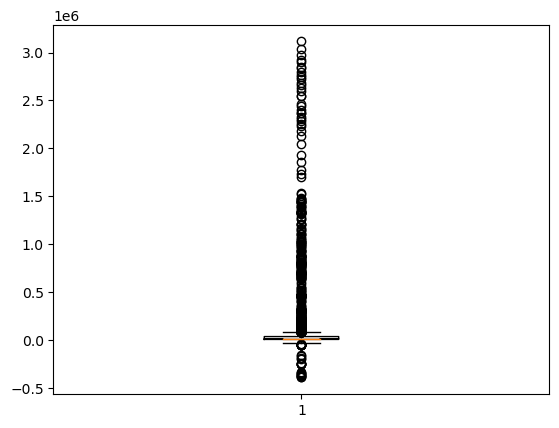

In [22]:
# Creates a boxplot of the Total Emissions data
plt.boxplot(carbon_csv.Total_Emissions, notch = True)
plt.show()

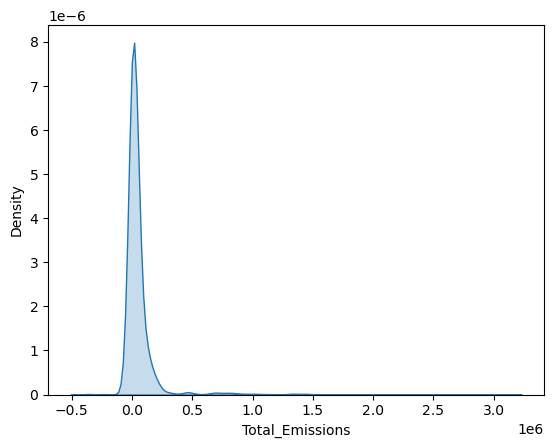

In [23]:
# Plots a kernel density plot to better see the distribution
sns.kdeplot(carbon_csv["Total_Emissions"], fill = True)
plt.show()

All the summary statistics and the plots show that there are significant outliers in the data. It is worth keeping them, however, because it is possible that some countries produce far more carbon emissions than others. 

In [24]:
# Saves the dataframe in a csv file
carbon_csv.to_csv("Milestone2Dataframe.csv", index = False)

### NEW Transformation: Subsetting the Dataframe

I was planning on joining the three datasets based on the country column. This will be more difficult with multiple entries for the same country. To make the final more simple, I will only use the most recent data from each country.

In [25]:
print(type(carbon_csv.Year))

<class 'pandas.core.series.Series'>


In [26]:
# Converts the Year column to numeric type
carbon_csv["Year"] = pd.to_numeric(carbon_csv["Year"], errors = "coerce")

In [27]:
# Finds the index of the most recent year for each country
idx_most_recent = carbon_csv.groupby("Country")["Year"].idxmax()

In [28]:
# Creates a new dataframe using the new index
simple_carbon = carbon_csv.loc[idx_most_recent]

In [29]:
# Resets and drops the index
simple_carbon = simple_carbon.reset_index(drop = True)

In [30]:
print(simple_carbon.head())

          Country  Year  Savanna_Fires  Forest_Fires  Crop_Residues  \
0     Afghanistan  2020        10.8427        0.0000       427.5284   
1         Albania  2020         2.5732        0.0000        37.9949   
2         Algeria  2020        41.1136      107.1825       361.0129   
3  American Samoa  2020         0.0000        0.0000            NaN   
4         Andorra  2020         0.0000        0.0000            NaN   

   Rice_Cultivation  Drained_Organic_Soils_Co2  Pesticides_Manufacturing  \
0        578.415600                      0.000                107.628149   
1        248.061497                    105.631                  8.000000   
2          1.317100                      0.000                 48.000000   
3       1410.445506                      0.000                 11.481085   
4        926.342279                      0.000                 11.481085   

   Food_Transport  Forestland  ...  Fires_In_Organic_Soils  \
0        545.3243    154.6574  ...                    

### Human Readable Dataset

#### (Only first five rows included) 

In [31]:
display(carbon_csv.head(5))

,Country,Year,Savanna_Fires,Forest_Fires,Crop_Residues,Rice_Cultivation,Drained_Organic_Soils_Co2,Pesticides_Manufacturing,Food_Transport,Forestland,...,Fires_In_Organic_Soils,Fires_In_Humid_Tropical_Forests,On_Farm_Energy_Use,Rural_Population,Urban_Population,Total_Population_Male,Total_Population_Female,Total_Emissions,Average_Temperature,Total_Population
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,0.0,0.0,NaN,9655167,2593947,5348387.0,5346409.0,2198.963539,0.536167,10694796.0
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,0.0,0.0,NaN,10230490,2763167,5372959.0,5372208.0,2323.876629,0.020667,10745167.0
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,0.0,0.0,NaN,10995568,2985663,6028494.0,6028939.0,2356.304229,-0.259583,12057433.0
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,0.0,0.0,NaN,11858090,3237009,7003641.0,7000119.0,2368.470529,0.101917,14003760.0
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,0.0,0.0,NaN,12690115,3482604,7733458.0,7722096.0,2500.768729,0.372250,15455554.0


In [32]:
print(type(carbon_csv))

<class 'pandas.core.frame.DataFrame'>


### Ethical Implications

   Updating the column names does not have ethical implications because all the original information was retained. 
    
   Selecting the two populations to use for the total population column could have potentially resulted in misrepresented populations. It seems likely that the male and female population counts were the most accurate, but the knowing the specific methods used to gather the data would help support my decision. Depending on future uses of the total population data, this could skew results and possibly show relationships that don't actually exist. This transformation has the greatest potential for negative impact out of all the transformations identified.
   
   Replacing missing values with NaN also does not have ethical implications because it is just another way to represent data that is not present.
   
   I decided to leave the outliers in the Total Emissions column as is because I feel they are accurate representations of different emissions by year and country. This could make future analysis more difficult, however, it maintains the integrity of the original data. 

## Milestone 3 - Website Data

#### Importing packages

In [33]:
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Parsing the Original Data

In [34]:
# Opens the file in read only mode with specified encoding
# Assigns the file data to the 'fd' variable
fd = open("List of countries by vehicles per capita - Wikipedia.html", "r", 
          encoding="utf-8")

# Parses the file object saved in 'fd' using BeautifulSoup
soup = BeautifulSoup(fd)

# Closes the 'fd' file
fd.close()

In [35]:
# Uses the find all function of BeautifulSoup to search the file for all
# instances of a <table> element
tables = soup.find_all("table")

print(type(tables))
print("Number of tables: {}".format(len(tables)))

<class 'bs4.element.ResultSet'>
Number of tables: 4


In [36]:
# Searches only for the tables that have a class of 'wikitable'
data_table = soup.find("table", {"class": "wikitable"})

print(type(data_table))
print("Number of Wikitables: {}".format(len(data_table)))

<class 'bs4.element.Tag'>
Number of Wikitables: 4


In [37]:
# Searches for all <thead> elements in the table
# Selects the first <thead> element
# Searches for all the <th> elements within the first <thead> element
# Pulls the text from each <th> element found
# Strips the text of whitespace
header1 = [th.getText().strip() for th in data_table.findAll(
'thead')[0].findAll('th')]

header1

['Country or region', 'Motor vehiclesper 1,000 people', 'Total', 'Year']

In [38]:
# Searches for the first <tbody> element in the table
# Searches for the first <tr> element within the <tbody> element
# Selects all rows
rows1 = data_table.findAll('tbody')[0].findAll('tr')

print(type(rows1))

<class 'bs4.element.ResultSet'>


In [39]:
# Iterates through all the <tr> elements stored in rows1 and creates a list
# Searches for the element <td> inside of each <tr> element
# Pulls the text from each <td> element
# Strips the text of all whitespace
# Results are added to a list nested inside of the outer list
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr
             in rows1]

print(type(data_rows1))

<class 'list'>


In [40]:
vehicles = pd.DataFrame(data_rows1, columns = header1)
print(display(vehicles.head()))
print(vehicles.shape)

,Country or region,"Motor vehiclesper 1,000 people",Total,Year
0,Gibraltar,"1,444","48,641",2022[1]
1,Guernsey,"1,365","86,000",2014[2]
2,San Marino,"1,300","44,200",2022[3]
3,Liechtenstein,"1,193","45,800",2022[4]
4,Andorra,"1,050","81,000",2021[5]


None
(195, 4)


### Transformation 1: Headers

For more consistency across the three datasets, I am replacing the header 'Region or country' with 'Country'. It is possible that not all of the entries are actual countries, but it will make the data more useable in the future. I am also replacing spaces with _ to maintain consistency between this dataset and my first dataset.

In [41]:
new_col_names = {"Country or region": "Country", 
                 "Motor vehiclesper 1,000 people": "Vehicles_per_1000_People",
                "Total": "Total_Number_of_Vehicles", "Year": "Year_Vehicles"}

vehicles.rename(columns = new_col_names, inplace = True)
print(display(vehicles.columns))

Index(['Country', 'Vehicles_per_1000_People', 'Total_Number_of_Vehicles',
       'Year_Vehicles'],
      dtype='object')

None


### Transformation 2: Removing Bracketed Numbers in the Year Column

The Year column currently has bracketed numbers left over. They were reference links in the original webpage. They hold no value in this dataframe so they will be dropped

In [42]:
# Function to remove the brackets and their contents
def remove_brackets(text):
    # Calls the substitution function
    # 'r' denotes a raw string so the backslashes are not treated as 
    # escape characters
    # Raw string includes backslashes and one or more digits
    # Replaces the expression with an empty string
    # Defines the substitution should take place in the text variable
    return re.sub(r'\[\d+\]', '', text)

In [43]:
vehicles["Year_Vehicles"] = [remove_brackets(item) for item in vehicles["Year_Vehicles"]]
print(vehicles["Year_Vehicles"])

0      2022
1      2014
2      2022
3      2022
4      2021
       ... 
190    2017
191    2019
192    2020
193    2019
194    2022
Name: Year_Vehicles, Length: 195, dtype: object


### Transformation 3: Re-ordering in Alphabetical Order Based on the Country

The flat file is ordered by country name from A-Z. It will be easier to compare the two if this data is in the same format. It is also easier to comprehend the order since we read from left to right.

In [44]:
vehicles = vehicles.sort_values(by = "Country")
print(display(vehicles.head()))

,Country,Vehicles_per_1000_People,Total_Number_of_Vehicles,Year_Vehicles
149,Afghanistan,61,"2,306,500",2019
91,Albania,238,"740,000",2022
117,Algeria,149,"6,395,730",2019
4,Andorra,"1,050","81,000",2021
161,Angola,36,"1,145,000",2019


None


### Transformation 4: Adding the Index Column to the Dataframe

The index column can provide potentially valuable information about the rank of the countries. A value of 1 means the country has the most motor vehicles per 1000 people while the value 195 means it has the least. This could be useful for comparison later

In [45]:
# Gives the axis a name
vehicles = vehicles.rename_axis("Rank")

In [46]:
# Resets the index but keeps the old one
vehicles = vehicles.reset_index(drop = False)
print(display(vehicles.head()))

,Rank,Country,Vehicles_per_1000_People,Total_Number_of_Vehicles,Year_Vehicles
0,149,Afghanistan,61,"2,306,500",2019
1,91,Albania,238,"740,000",2022
2,117,Algeria,149,"6,395,730",2019
3,4,Andorra,"1,050","81,000",2021
4,161,Angola,36,"1,145,000",2019


None


### Transformation 5: Checking for Outliers in the Total Number of Vehicles Column

I plan to look at a possible relationship between carbon emissions and the total number of vehicles. To do this, I need to check the Total Number of Vehicles column for any outliers or potentially bad data.

In [47]:
# Prints the summary statistics for the Total Number of Vehicles column
print(vehicles["Total_Number_of_Vehicles"].describe())

count           195
unique          191
top       2,000,000
freq              4
Name: Total_Number_of_Vehicles, dtype: object


In [48]:
# Gives the type of data for each column
print(vehicles.dtypes)

Rank                         int64
Country                     object
Vehicles_per_1000_People    object
Total_Number_of_Vehicles    object
Year_Vehicles               object
dtype: object


In [49]:
# Defines a function to remove the commas and convert that data to float type
def remove_columns_convert(value):
    return float(value.replace(",", ""))

In [50]:
columns_type_change = ["Vehicles_per_1000_People", "Total_Number_of_Vehicles"]

In [51]:
# Iterates over the list of columns
for column in columns_type_change:
    # Applies the function to each list entry
    vehicles[column] = vehicles[column].apply(remove_columns_convert)

In [52]:
print(vehicles.dtypes)

Rank                          int64
Country                      object
Vehicles_per_1000_People    float64
Total_Number_of_Vehicles    float64
Year_Vehicles                object
dtype: object


In [53]:
print(vehicles["Total_Number_of_Vehicles"].describe())

count    1.950000e+02
mean     9.075496e+06
std      3.359423e+07
min      4.048000e+03
25%      2.280810e+05
50%      1.131821e+06
75%      4.493697e+06
max      3.150000e+08
Name: Total_Number_of_Vehicles, dtype: float64


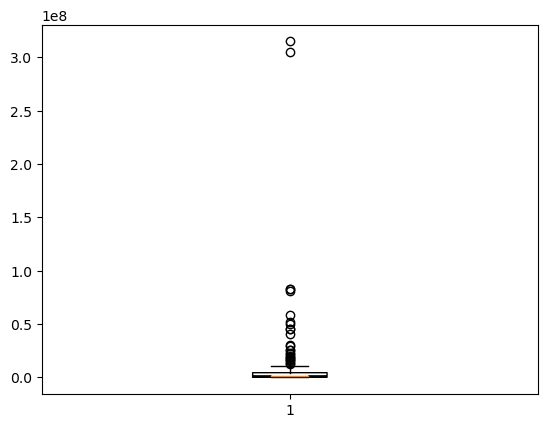

In [54]:
# Creates a boxplot
plt.boxplot(vehicles.Total_Number_of_Vehicles, notch = True)
plt.show()

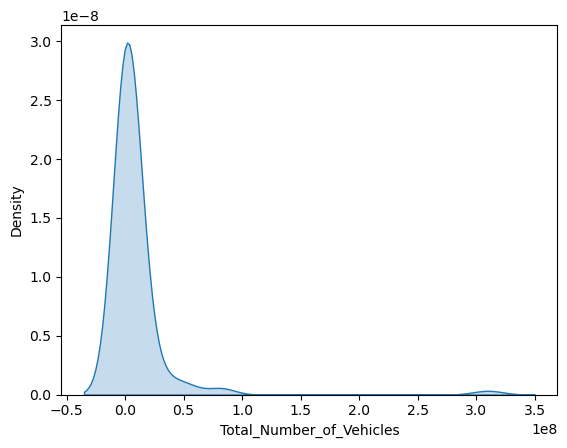

In [55]:
# Plots a kernel density plot to better see the distribution
sns.kdeplot(vehicles["Total_Number_of_Vehicles"], fill = True)
plt.show()

In [56]:
top_two_vehicles = vehicles.nlargest(2, "Total_Number_of_Vehicles")
print(display(top_two_vehicles))

,Rank,Country,Vehicles_per_1000_People,Total_Number_of_Vehicles,Year_Vehicles
35,96,China,221.0,315000000.0,2022
185,6,United States,908.0,305000000.0,2023


None


There appear to be two data points that are significant outliers. It is worth keeping them because it is possible that some countries have far more vehicles than others. The two outliers are China and the United States.

It is interesting to note that while these two countries are the outliers for Total Number of Vehicles, they do NOT have the largest number of vehicles per 1,000 people

### Transformation 6: Checking for Outliers in the Vehicles per 1,000 People Column

After seeing the results for the Total Number of Vehicles outliers, it would be worth knowing if there are also outliers in the Vehicles per 1,000 People column as well.

In [57]:
# Prints the summary statistics for the Vehicles per 1,000 People column
print(vehicles["Vehicles_per_1000_People"].describe())

count     195.000000
mean      310.902564
std       291.569368
min         1.000000
25%        67.500000
50%       218.000000
75%       516.500000
max      1444.000000
Name: Vehicles_per_1000_People, dtype: float64


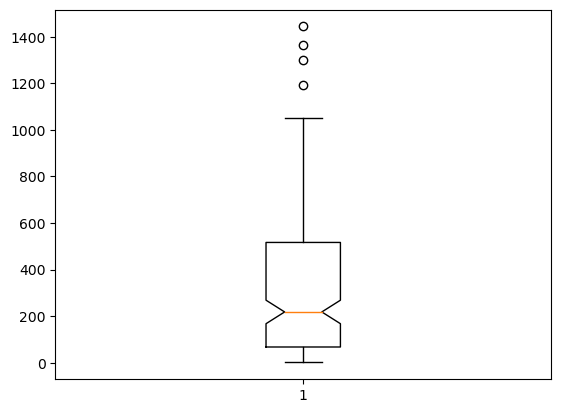

In [58]:
# Creates a boxplot
plt.boxplot(vehicles.Vehicles_per_1000_People, notch = True)
plt.show()

In [59]:
top_four = vehicles.nlargest(4, "Vehicles_per_1000_People")
print(display(top_four))

,Rank,Country,Vehicles_per_1000_People,Total_Number_of_Vehicles,Year_Vehicles
63,0,Gibraltar,1444.0,48641.0,2022
69,1,Guernsey,1365.0,86000.0,2014
149,2,San Marino,1300.0,44200.0,2022
100,3,Liechtenstein,1193.0,45800.0,2022


None


There are four countries that show as outliers in the boxplot. Again, this data is worth keeping but it is also worth noting that they are outliers.

### Human Readable Dataset

#### (Only first five rows included)

In [60]:
display(vehicles.head(5))

,Rank,Country,Vehicles_per_1000_People,Total_Number_of_Vehicles,Year_Vehicles
0,149,Afghanistan,61.0,2306500.0,2019
1,91,Albania,238.0,740000.0,2022
2,117,Algeria,149.0,6395730.0,2019
3,4,Andorra,1050.0,81000.0,2021
4,161,Angola,36.0,1145000.0,2019


In [61]:
# Saves the dataframe in a csv file
vehicles.to_csv("Milestone3Dataframe.csv", index = False)

### Ethical Implications

Updating the column names does not have ethical implications because all the original information was retained. However, renaming the column to just "Country" might misrepresent the political status of any region that is not officially considered a country. After combining the datasets, the column header could be reverted back to "Country or Region" for a more accurate political representation.
   
   No data was actually altered and the dataset has retained its original shape and information. 
   
   It is important to note that the Rank column reflects the rank of the number of vehicles per 1000 people and not the total number of vehicles. That could be a point of confusion when reviewing the dataset. The Rank column also begins with 0 instead of 1.
   
   Outliers were not removed as it is possible that there are countries that have significantly more vehicles or vehicles per 1000 people. This could be a result of much larger populations, less public transit access, or a variety of other factors.

## Milestone 4 - API

#### Importing Packages

In [62]:
import requests
import pandas as pd
import json
from datetime import datetime

### Storing the API Key

In [63]:
openaqi_apikey = "34e461be0d600abe6611e0160ef83680ae0f17b19bfa506914d846f3359ee8c7"

In [64]:
AQAPIkeys = {"OpenAQapi": openaqi_apikey}

print(AQAPIkeys)
print(type(AQAPIkeys))

{'OpenAQapi': '34e461be0d600abe6611e0160ef83680ae0f17b19bfa506914d846f3359ee8c7'}
<class 'dict'>


In [65]:
# Opens the json file in a writable format
with open("AQAPIkeys.json", "w") as json_file:
    
    # Puts the dictionary into the file
    json.dump(AQAPIkeys, json_file, indent = 4)

In [66]:
# Opens the json file
with open("APIkey.json") as f:
    # Loads the file into the keys variable
    keys = json.load(f)
    # Accesses the value for the OpenAQapi key
    openaq = keys["OpenAQapi"]

### Accessing the API

Function to make the API calls.

In [67]:
def api_call(url, method = "GET", headers = None):
    try:
        print(f"Retrieving data now...")
        print(url)
        
        # Variable to access the url
        response = requests.get(url, headers = headers)
        
        if response.status_code == 200:
            print("Request successful!")
            # Loads in the information found on the site
            json_data = response.json()
            return json_data
        
        else:
            print(f"API request failed with status code {response.status_code}")
    except requests.exceptions.RequestException as e:
        print(f"API request failed: {e}")

Function to extract the desired results from API calls

In [68]:
def extract_data(json_data, keys_to_extract):
    try:
        # If the desired key is in the data
        if "results" in json_data:
            # Stores the data from that key to the variable
            results_data = json_data["results"]
            
            # Creates a list of they key-value pairs for the designated keys
            extracted_data = [{key: item[key] for key in keys_to_extract} 
                              for item in results_data]
            
            # Creates a dataframe from the extracted data
            df = pd.DataFrame(extracted_data)
            
            return df
        else:
            print("'Results' key not found in JSON data.")
            return None
    
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [69]:
headers = {"accept": "application/json", "X-API-Key": openaq}

In [70]:
country_url = "https://api.openaq.org/v3/countries?order_by=id&sort_order=asc&limit=1000&page=1"

In [71]:
# Calls the function to call the API 
country_response = api_call(country_url, method = "GET", headers = None)

Retrieving data now...
https://api.openaq.org/v3/countries?order_by=id&sort_order=asc&limit=1000&page=1
Request successful!


In [72]:
# Gives a list of the keys to extract
country_keys = ["id", "code", "name", "datetimeFirst", "datetimeLast"]

In [73]:
# Calls the function to extract the desired data from the JSON data
country_df = extract_data(country_response, country_keys)
display(country_df)

,id,code,name,datetimeFirst,datetimeLast
0,1,NO,Norway,2016-12-02T10:00:00Z,2023-11-18T17:48:05Z
1,2,FR,France,2016-11-17T23:00:00Z,2023-11-18T17:47:57Z
2,4,,N. Cyprus,2021-03-19T11:34:24Z,2022-10-21T08:00:52Z
3,5,AQ,Antarctica,2018-11-30T11:00:00Z,2021-02-04T14:00:00Z
4,7,FJ,Fiji,2021-01-08T23:15:31Z,2023-08-28T21:33:44Z
...,...,...,...,...,...
138,173,ET,Ethiopia,2016-08-18T22:00:00Z,2023-11-18T17:47:51Z
139,174,RS,Serbia,2017-09-22T09:00:00Z,2023-11-18T17:47:45Z
140,175,ME,Montenegro,2022-03-24T14:00:00Z,2023-11-18T08:00:00Z
141,176,XK,Kosovo,2016-04-08T20:00:00Z,2023-11-18T17:48:03Z


### Transformation 1: Parsing the Timestamp Columns

Because the other two datasets contain time-relevant data at the year level, it might be useful to see when data collected started and stopped for the API data.

In [74]:
# Function to parse the timestamp
def parse_timestamps(timestamp):
    # Tries to parse the data using the first format
    try:
        parsed_time = datetime.strptime(timestamp,"%Y-%m-%dT%H:%M:%S%z")
   
    # Gives a ValueError if the data is not in the correct format
    except ValueError:
        # Tries to parse the data using the second format
        try:
            parsed_time = datetime.strptime(timestamp,"%Y-%m-%dT%H:%M:%SZ")
        except ValueError:
            return None
    # Returns only the year associated with the parsed data    
    return parsed_time.year

In [75]:
# Calls the function for both of the timestamp columns
country_df["Start_Year"] = country_df["datetimeFirst"].apply(parse_timestamps)
country_df["End_Year"] = country_df["datetimeLast"].apply(parse_timestamps)
display(country_df)

,id,code,name,datetimeFirst,datetimeLast,Start_Year,End_Year
0,1,NO,Norway,2016-12-02T10:00:00Z,2023-11-18T17:48:05Z,2016,2023.0
1,2,FR,France,2016-11-17T23:00:00Z,2023-11-18T17:47:57Z,2016,2023.0
2,4,,N. Cyprus,2021-03-19T11:34:24Z,2022-10-21T08:00:52Z,2021,2022.0
3,5,AQ,Antarctica,2018-11-30T11:00:00Z,2021-02-04T14:00:00Z,2018,2021.0
4,7,FJ,Fiji,2021-01-08T23:15:31Z,2023-08-28T21:33:44Z,2021,2023.0
...,...,...,...,...,...,...,...
138,173,ET,Ethiopia,2016-08-18T22:00:00Z,2023-11-18T17:47:51Z,2016,2023.0
139,174,RS,Serbia,2017-09-22T09:00:00Z,2023-11-18T17:47:45Z,2017,2023.0
140,175,ME,Montenegro,2022-03-24T14:00:00Z,2023-11-18T08:00:00Z,2022,2023.0
141,176,XK,Kosovo,2016-04-08T20:00:00Z,2023-11-18T17:48:03Z,2016,2023.0


### Transformation 2: Subsetting the Data

The original format of the datetimeFirst and datetimeLast columns are no longer needed and make the dataset look cluttered. They are removed below.

In [76]:
# Subsets the dataframe
country_df = country_df[["code", "name", "Start_Year", "End_Year"]]

### Transformation 3: Headers

To maintain consistency and improve readability, the headers for each column should be capitalized and the 'name' column renamed to 'Country'. Because there are not that many columns in this data set, it made sense to use the rename function.

In [77]:
country_df = country_df.rename(columns = {"name": "Country", "code": "Code"})
display(country_df)

,Code,Country,Start_Year,End_Year
0,NO,Norway,2016,2023.0
1,FR,France,2016,2023.0
2,,N. Cyprus,2021,2022.0
3,AQ,Antarctica,2018,2021.0
4,FJ,Fiji,2021,2023.0
...,...,...,...,...
138,ET,Ethiopia,2016,2023.0
139,RS,Serbia,2017,2023.0
140,ME,Montenegro,2022,2023.0
141,XK,Kosovo,2016,2023.0


### Second API Call

The dataset obtained in the first API call does not contain much detailed information about each country. It does contain the country codes needed to interpret the country information from a second API call that retrieves discrete measurements.

Function to make the second API call. It loops over multiple pages.

In [78]:
def fetch_all_pages(url, keys_to_extract):
    # Creates an empty list to store the information from each page
    all_pages = []
    # Starts at page 1
    page = 1
    
    try:
        # While there are subsequent pages to search
        while True:
            # Makes a call to the API while adding in the current page number
            response = requests.get(url + f"&page={page}", headers = headers)
        
            # Raises an exception if there is an error with the page
            if response.status_code != 200:
                raise Exception(f"API request failed with response code: {response.status_code}")
        
            else:
                print(f"{page} connection successful!")
            
            # Stores the data 
            data = response.json()
            
            # Checks if the desired key is in the data
            if "results" in data:
                # Stores the data from the desired key in the variable
                page_results = data["results"]
            
                # Iterates over the keys list to store desired data
                extracted_data = [{key: item[key] for key in keys_to_extract} for item in page_results]
                # Extends the data to the already existing data stored in 
                # the list
                all_pages.extend(extracted_data)
                
                # Adds a page number to the page variable each iteration
                page += 1
            
            else:
                break
             
    except Exception as e:
        print(f"An error occurred: {e}")
            
    return all_pages

In [79]:
location_base_url = "https://api.openaq.org/v2/measurements?date_from=2000-01-01T00%3A00%3A00Z&date_to=2023-10-03T18%3A14%3A00Z&limit=1000&sort=desc&radius=1"

In [80]:
locationId_keys = ["locationId", "parameter", "value", "date", "country"]

In [81]:
# Calls the function to make multiple API calls to individual pages
locationID_results = fetch_all_pages(location_base_url, locationId_keys)

1 connection successful!
2 connection successful!
3 connection successful!
4 connection successful!
5 connection successful!
6 connection successful!
7 connection successful!
8 connection successful!
9 connection successful!
10 connection successful!
11 connection successful!
12 connection successful!
13 connection successful!
14 connection successful!
15 connection successful!
16 connection successful!
17 connection successful!
18 connection successful!
19 connection successful!
20 connection successful!
21 connection successful!
22 connection successful!
23 connection successful!
An error occurred: API request failed with response code: 408


In [82]:
# Creates a dataframe from the API calls
location_df = pd.DataFrame(locationID_results)
display(location_df)

,locationId,parameter,value,date,country
0,1638531,pm25,11.100000,"{'utc': '2023-10-03T18:00:00+00:00', 'local': ...",US
1,1477633,pm25,1.400000,"{'utc': '2023-10-03T18:00:00+00:00', 'local': ...",US
2,1461244,temperature,24.149587,"{'utc': '2023-10-03T18:00:00+00:00', 'local': ...",US
3,1377907,pm10,24.000000,"{'utc': '2023-10-03T18:00:00+00:00', 'local': ...",US
4,1371119,temperature,24.332639,"{'utc': '2023-10-03T18:00:00+00:00', 'local': ...",ZA
...,...,...,...,...,...
22995,1333427,um003,1.265385,"{'utc': '2023-10-03T18:00:00+00:00', 'local': ...",NO
22996,1333427,um100,0.000000,"{'utc': '2023-10-03T18:00:00+00:00', 'local': ...",NO
22997,1333427,pm10,0.361538,"{'utc': '2023-10-03T18:00:00+00:00', 'local': ...",NO
22998,1333427,pressure,1003.461538,"{'utc': '2023-10-03T18:00:00+00:00', 'local': ...",NO


In [83]:
# Looks at how many unique countries are included in the data
print(len(location_df["country"].unique()))

72


### Transformation 4: Parsing Information in the Date Column

The data for the date column pulled in as a dictionary with two keys because of the way the call function was written. Only the utc date will be useful because local time does not need to be accounted for.

In [84]:
location_df["Year_Recorded"] = location_df["date"].apply(lambda x: x.get("utc"))

### Transformation 5: Subsetting the Second Dataframe

Originally I thought the location_id information would be useful but the real column of interest is the country column. Below is the dataframe without the location_id and the date column whose information has been replaced with the Year_Recorded column.

In [85]:
# Subsets the dataframe to include only the needed columns
location_df = location_df[["parameter", "value", "country", "Year_Recorded"]]

### Transformation 6: Parsing the Year_Recorded Column

To keep measurements consistent, only the year of the measurement is important.

In [86]:
location_df["Year_Recorded"] = location_df["Year_Recorded"].apply(parse_timestamps)
display(location_df)

,parameter,value,country,Year_Recorded
0,pm25,11.100000,US,2023
1,pm25,1.400000,US,2023
2,temperature,24.149587,US,2023
3,pm10,24.000000,US,2023
4,temperature,24.332639,ZA,2023
...,...,...,...,...
22995,um003,1.265385,NO,2023
22996,um100,0.000000,NO,2023
22997,pm10,0.361538,NO,2023
22998,pressure,1003.461538,NO,2023


In [87]:
# Checks how many different years are accounted for
print(len(location_df["Year_Recorded"].unique()))

1


### Transformation 7: Sorting the Dataframe Alphabetically

I plan to make further transformations that will group information from different locations by their respective countries. To more easily see this I need the information for each country to be grouped together.

In [88]:
sorted_location_df = location_df.sort_values(by = "country")
display(sorted_location_df)

,parameter,value,country,Year_Recorded
1022,pm10,84.000000,AE,2023
1020,pm10,131.000000,AE,2023
1021,so2,6.080000,AE,2023
22524,voc,145.512000,AR,2023
22523,temperature,70.960000,AR,2023
...,...,...,...,...
12052,pm25,2.259259,ZA,2023
7971,pm25,2.197222,ZA,2023
7970,temperature,19.090972,ZA,2023
9628,pm25,33.333333,ZA,2023


### Transformation 8: Unpivoting the Parameters Column

I will be taking the average of all readings from each country to look at the data from a country level instead of individual measurements recorded across each country. To do this the various parameters need to each have their own columns with their associated values recorded below. 

In [89]:
# Sets the Year_Recorded and country columns as indices
# Defines the parameter and value columns as the ones to unpivot
# Accounts for duplicate values by aggregating using the mean
pivoted_location_df = sorted_location_df.pivot_table(index = ["Year_Recorded", 
                                                              "country"],
                                               columns = "parameter", 
                                               values = "value",
                                              aggfunc = "mean")

# Resets the index
pivoted_location_df.reset_index(inplace = True)

# Sets the name of the index column to None
pivoted_location_df.index.name = None

# Fills in any missing values with N/A
pivoted_location_df.fillna("N/A", inplace = True)

display(pivoted_location_df)

parameter,Year_Recorded,country,bc,co,humidity,no,no2,nox,o3,pm1,...,relativehumidity,so2,temperature,um003,um005,um010,um025,um050,um100,voc
0,2023,AE,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,N/A,6.08,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1,2023,AR,N/A,N/A,41.92,N/A,7.0,N/A,N/A,N/A,...,N/A,N/A,70.96,10.1124,2.9536,N/A,N/A,0.0204,N/A,145.512
2,2023,AT,N/A,N/A,N/A,0.517567,N/A,N/A,N/A,N/A,...,N/A,N/A,21.530474,N/A,N/A,N/A,N/A,N/A,N/A,N/A
3,2023,AU,N/A,N/A,36.70106,N/A,N/A,N/A,0.025,1.453206,...,N/A,N/A,72.793629,4.577205,1.241951,0.162004,0.015161,0.004343,0.000471,64.596291
4,2023,AZ,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,N/A,N/A,73.0,N/A,N/A,N/A,N/A,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2023,UA,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,N/A,N/A,17.595833,24.135833,6.905833,N/A,N/A,N/A,N/A,N/A
68,2023,UG,N/A,N/A,44.730763,N/A,N/A,N/A,N/A,N/A,...,N/A,N/A,80.628623,149.106658,58.565136,N/A,N/A,2.774946,N/A,196.282609
69,2023,US,N/A,0.1,43.627276,0.0,0.005433,0.001,0.041294,8.287903,...,N/A,0.000567,75.719157,10.174152,2.989547,0.483427,0.03543,0.006821,0.001732,88.075294
70,2023,VN,N/A,N/A,38.033333,N/A,N/A,N/A,N/A,15.591801,...,N/A,N/A,97.142857,46.535333,13.684,2.415667,0.269333,0.088333,0.016333,51.333333


In [90]:
# Prints the values for one of the unpivoted columns for a visual check of
# the calculations.
print(pivoted_location_df.loc[0:2, "pm10"])

0     107.5
1      23.0
2    16.731
Name: pm10, dtype: object


### Transformation 9: Headers

The headers need to be capitalized to maintain consistency across all datasets. The country column for this second dataset contains information that is found in the code column of the original dataset. I will also rename columns to the best of my ability so it is clearer what each contains for those who aren't as familiar with chemistry notation.

In [91]:
print(pd.Series(pivoted_location_df.columns))

0        Year_Recorded
1              country
2                   bc
3                   co
4             humidity
5                   no
6                  no2
7                  nox
8                   o3
9                  pm1
10                pm10
11                pm25
12                 pm4
13            pressure
14    relativehumidity
15                 so2
16         temperature
17               um003
18               um005
19               um010
20               um025
21               um050
22               um100
23                 voc
Name: parameter, dtype: object


In [92]:
header_replacments = {"country": "Code", "bc": "Black_Carbon", "co": "Carbon_Monoxide",
                     "humidity": "Humidity", "no": "Nitrogen_Monoxide",
                     "no2": "Nitrogen_Dioxide", "nox": "Nitrogen_Oxides",
                     "o3": "Ozone1", "ozone": "Ozone", "pm1": "PM_1",
                     "pm10": "PM_10", "pm25": "PM_25", "pm4": "PM_4",
                     "pressure": "Pressure", "relativehumidity": "Relative_Humidity",
                     "so2": "Sulfur_Dioxide", "temperature": "Temperature",
                     "um003": "UM_003", "um005": "UM_005", "um010": "UM_010",
                     "um025": "UM_025", "um050": "UM_050", "um100": "UM_100",
                     "voc": "Volatile_Organic_Compounds"}

In [93]:
final_location_df = pivoted_location_df.rename(columns = (header_replacments))
print(final_location_df.columns)

Index(['Year_Recorded', 'Code', 'Black_Carbon', 'Carbon_Monoxide', 'Humidity',
       'Nitrogen_Monoxide', 'Nitrogen_Dioxide', 'Nitrogen_Oxides', 'Ozone1',
       'PM_1', 'PM_10', 'PM_25', 'PM_4', 'Pressure', 'Relative_Humidity',
       'Sulfur_Dioxide', 'Temperature', 'UM_003', 'UM_005', 'UM_010', 'UM_025',
       'UM_050', 'UM_100', 'Volatile_Organic_Compounds'],
      dtype='object', name='parameter')


In [94]:
# Checks for missing values in any column
missing_api = final_location_df.isnull().any()
print("Columns with missing data:\n", missing_api)

Columns with missing data:
 parameter
Year_Recorded                 False
Code                          False
Black_Carbon                  False
Carbon_Monoxide               False
Humidity                      False
Nitrogen_Monoxide             False
Nitrogen_Dioxide              False
Nitrogen_Oxides               False
Ozone1                        False
PM_1                          False
PM_10                         False
PM_25                         False
PM_4                          False
Pressure                      False
Relative_Humidity             False
Sulfur_Dioxide                False
Temperature                   False
UM_003                        False
UM_005                        False
UM_010                        False
UM_025                        False
UM_050                        False
UM_100                        False
Volatile_Organic_Compounds    False
dtype: bool


In [95]:
# Checks for missing values in any column
missing_api = final_location_df.isna().any()
print("Columns with missing data:\n", missing_api)

Columns with missing data:
 parameter
Year_Recorded                 False
Code                          False
Black_Carbon                  False
Carbon_Monoxide               False
Humidity                      False
Nitrogen_Monoxide             False
Nitrogen_Dioxide              False
Nitrogen_Oxides               False
Ozone1                        False
PM_1                          False
PM_10                         False
PM_25                         False
PM_4                          False
Pressure                      False
Relative_Humidity             False
Sulfur_Dioxide                False
Temperature                   False
UM_003                        False
UM_005                        False
UM_010                        False
UM_025                        False
UM_050                        False
UM_100                        False
Volatile_Organic_Compounds    False
dtype: bool


In [96]:
final_location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year_Recorded               72 non-null     int64 
 1   Code                        72 non-null     object
 2   Black_Carbon                72 non-null     object
 3   Carbon_Monoxide             72 non-null     object
 4   Humidity                    72 non-null     object
 5   Nitrogen_Monoxide           72 non-null     object
 6   Nitrogen_Dioxide            72 non-null     object
 7   Nitrogen_Oxides             72 non-null     object
 8   Ozone1                      72 non-null     object
 9   PM_1                        72 non-null     object
 10  PM_10                       72 non-null     object
 11  PM_25                       72 non-null     object
 12  PM_4                        72 non-null     object
 13  Pressure                    72 non-null     object
 

In [97]:
columns_to_convert = ["Black_Carbon", "Carbon_Monoxide", "Humidity", "Nitrogen_Monoxide", "Nitrogen_Dioxide", "Nitrogen_Oxides", "Ozone1", "PM_1", "PM_10",
                     "PM_25", "PM_4", "Pressure", "Relative_Humidity", "Sulfur_Dioxide", "Temperature", "UM_003", "UM_005", "UM_010", "UM_025", "UM_050", "UM_100",
                     "Volatile_Organic_Compounds"]

In [98]:
# Converts the list of columns to numeric type
final_location_df[columns_to_convert] = final_location_df[columns_to_convert].apply(pd.to_numeric, errors = "coerce")

In [99]:
final_location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year_Recorded               72 non-null     int64  
 1   Code                        72 non-null     object 
 2   Black_Carbon                1 non-null      float64
 3   Carbon_Monoxide             9 non-null      float64
 4   Humidity                    44 non-null     float64
 5   Nitrogen_Monoxide           13 non-null     float64
 6   Nitrogen_Dioxide            17 non-null     float64
 7   Nitrogen_Oxides             4 non-null      float64
 8   Ozone1                      10 non-null     float64
 9   PM_1                        44 non-null     float64
 10  PM_10                       46 non-null     float64
 11  PM_25                       52 non-null     float64
 12  PM_4                        2 non-null      float64
 13  Pressure                    46 non-nu

In [100]:
final_location_df.isna().any()

parameter
Year_Recorded                 False
Code                          False
Black_Carbon                   True
Carbon_Monoxide                True
Humidity                       True
Nitrogen_Monoxide              True
Nitrogen_Dioxide               True
Nitrogen_Oxides                True
Ozone1                         True
PM_1                           True
PM_10                          True
PM_25                          True
PM_4                           True
Pressure                       True
Relative_Humidity              True
Sulfur_Dioxide                 True
Temperature                    True
UM_003                         True
UM_005                         True
UM_010                         True
UM_025                         True
UM_050                         True
UM_100                         True
Volatile_Organic_Compounds     True
dtype: bool

### Transformation 10: Combining the Dataframes
### Human Readable Dataset

Both dataframes have useful information so they will be combined based on their codes. This will ensure that only countries with specific pollutant information will be in the final dataframe and that their country names will be displayed as well as their ISO codes.

In [101]:
# Merges the two dataframes together
# Will exclude any countries whose code was not in both dataframes
merged_df = pd.merge(country_df, final_location_df, on = "Code", how = "inner")
display(merged_df)

,Code,Country,Start_Year,End_Year,Year_Recorded,Black_Carbon,Carbon_Monoxide,Humidity,Nitrogen_Monoxide,Nitrogen_Dioxide,...,Relative_Humidity,Sulfur_Dioxide,Temperature,UM_003,UM_005,UM_010,UM_025,UM_050,UM_100,Volatile_Organic_Compounds
0,NO,Norway,2016,2023.0,2023,NaN,NaN,41.760181,NaN,NaN,...,36.203,NaN,73.987131,18.704968,5.435628,1.106348,0.099211,0.022310,0.007722,82.281244
1,FR,France,2016,2023.0,2023,NaN,NaN,84.888889,0.900000,22.375000,...,NaN,NaN,74.681034,11.158391,4.972203,NaN,NaN,0.004444,NaN,NaN
2,CA,Canada,2016,2023.0,2023,NaN,NaN,49.148254,0.000333,0.003143,...,NaN,0.000100,65.803935,10.288750,2.907164,0.421493,0.028303,0.004709,0.000555,80.229452
3,BZ,Belize,2021,2023.0,2023,NaN,NaN,40.724138,NaN,NaN,...,NaN,NaN,103.689655,4.338966,1.233793,0.128621,0.002069,0.000000,0.000000,NaN
4,US,United States of America,2016,2023.0,2023,NaN,0.1,43.627276,0.000000,0.005433,...,NaN,0.000567,75.719157,10.174152,2.989547,0.483427,0.035430,0.006821,0.001732,88.075294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,PH,Philippines,2021,2023.0,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,JP,Japan,2021,2023.0,2023,NaN,0.2,NaN,0.001400,0.003714,...,NaN,0.000538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,PY,Paraguay,2023,2023.0,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,SA,Saudi Arabia,2019,2023.0,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.511786,0.301071,NaN,NaN,NaN


In [102]:
# Saves the dataframe in a csv file
merged_df.to_csv("Milestone4Dataframe.csv", index = False)

### Ethical Implications

There are many ethical implications that should be considered when looking at the final dataset for this milestone. In fact, this dataset is not suitable for any sort of publication but I believe it meets the requirements of the final project for this class.

The implications all arise in the calls and transformations made to the second dataset.

1. The number of calls that are able to be made vary each time the script is run. This is because the call iterates over the number of pages. It is not possible to pull all of the information available for each country using the call the way it is written. It accesses a different number of pages each time due to restrictions on the number of calls.
    This means that collected data may be cut off if a country's information is split between one page and the next and may, therefore, be incomplete for the year.
    
    
2. It appears the measurements may be recorded differently based on who was recording the information. For example, the "Ozone" columns appear like they should be able to be combined. Originally one was labeled o3 (scientific notation for ozone) while the other was already labeled ozone. I did not combine them because I cannot say that they record the same thing in the same way. This would warrant deeper investigation into how each location records ozone and may not only vary country by country, but location by location within each country.


3. The calls are made to two different versions of the API. The documentation gave guidance for how to make the first call (countries) using version 3 of the API, but the location id documentation (second call) was made using version 2. There may be differences in the way data was recorded, what was included, etc. It would warrant further investigation.


4. The data may be misleading because averages for each measurement were taken without first looking for outliers. For example, is an average temperature of the United States truly reflective of the entire country? It suffices for this project, however, it may be affected by outliers and would be best interpreted as a general idea rather than a solid number. 

# Milestone 5

### Importing Packages

In [103]:
import sqlite3

## SQL Database

### Loading Data into SQL Lite 

In [104]:
# Connects to sqlite3 and creates a new database
conn = sqlite3.connect("DSC540Final.db")

In [105]:
# Creates a dictionary of table names and their associated dataframes
dataframes = {"CSV": simple_carbon, "Website": vehicles, "API": merged_df}

In [106]:
# Iterates over each item in the dictionary
# Creates a table for each in the database
for table_name, df in dataframes.items():
    df.to_sql(table_name, conn, index = False, if_exists = "replace")

In [107]:
cursor = conn.cursor()

In [108]:
cursor.execute("PRAGMA foreign_keys = 1")

### Joining the Datasets

In [109]:
# Creates a query to join the datasets based on the Country columns
query = """ SELECT *
FROM CSV
JOIN Website ON CSV.Country = Website.Country
JOIN API ON CSV.Country = API.Country"""

In [110]:
# Converts the joined SQL data into a dataframe
final_df1 = pd.read_sql(query, conn)
print(final_df1.head(2))
conn.close()

     Country  Year  Savanna_Fires  Forest_Fires  Crop_Residues  \
0  Argentina  2020      3569.1449     1362.1267      7405.2933   
1  Australia  2020     13405.8811    10985.2467      1888.7887   

   Rice_Cultivation  Drained_Organic_Soils_Co2  Pesticides_Manufacturing  \
0         1452.7520                  5215.7866                    7467.0   
1           44.1617                  2857.1293                    2572.0   

   Food_Transport  Forestland  ...  Relative_Humidity  Sulfur_Dioxide  \
0       5468.9167 -27952.2907  ...                NaN             NaN   
1      10125.9783  -1585.0912  ...                NaN             NaN   

   Temperature     UM_003    UM_005    UM_010    UM_025    UM_050    UM_100  \
0    70.960000  10.112400  2.953600       NaN       NaN  0.020400       NaN   
1    72.793629   4.577205  1.241951  0.162004  0.015161  0.004343  0.000471   

   Volatile_Organic_Compounds  
0                  145.512000  
1                   64.596291  

[2 rows x 64 colu

In [111]:
display(final_df1.columns) 

Index(['Country', 'Year', 'Savanna_Fires', 'Forest_Fires', 'Crop_Residues',
       'Rice_Cultivation', 'Drained_Organic_Soils_Co2',
       'Pesticides_Manufacturing', 'Food_Transport', 'Forestland',
       'Net_Forest_Conversion', 'Food_Household_Consumption', 'Food_Retail',
       'On_Farm_Electricity_Use', 'Food_Packaging',
       'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
       'Fertilizers_Manufacturing', 'Ippu', 'Manure_Applied_To_Soils',
       'Manure_Left_On_Pasture', 'Manure_Management', 'Fires_In_Organic_Soils',
       'Fires_In_Humid_Tropical_Forests', 'On_Farm_Energy_Use',
       'Rural_Population', 'Urban_Population', 'Total_Population_Male',
       'Total_Population_Female', 'Total_Emissions', 'Average_Temperature',
       'Total_Population', 'Rank', 'Country', 'Vehicles_per_1000_People',
       'Total_Number_of_Vehicles', 'Year_Vehicles', 'Code', 'Country',
       'Start_Year', 'End_Year', 'Year_Recorded', 'Black_Carbon',
       'Carbon_Monoxide', 'Humidity',

In [112]:
# Provides a visual check to ensure the Country data lined up properly
check_df = final_df1["Country"]
print(check_df)

                 Country               Country               Country
0              Argentina             Argentina             Argentina
1              Australia             Australia             Australia
2                Austria               Austria               Austria
3             Azerbaijan            Azerbaijan            Azerbaijan
4             Bangladesh            Bangladesh            Bangladesh
..                   ...                   ...                   ...
57           Switzerland           Switzerland           Switzerland
58              Thailand              Thailand              Thailand
59                Uganda                Uganda                Uganda
60               Ukraine               Ukraine               Ukraine
61  United Arab Emirates  United Arab Emirates  United Arab Emirates

[62 rows x 3 columns]


### Cleaning the Final Dataset

Some data cleaning was performed on certain datasets but not others. Due to the number of transformations made to the API dataset, the data itself was not thoroughly cleaned. There appear to be multiple columns that contain very little information so further cleaning will occur to make the final dataset easier to work with.

In [113]:
# Checks the data type and null count for each column
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 64 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          62 non-null     object 
 1   Year                             62 non-null     int64  
 2   Savanna_Fires                    62 non-null     float64
 3   Forest_Fires                     62 non-null     float64
 4   Crop_Residues                    62 non-null     float64
 5   Rice_Cultivation                 62 non-null     float64
 6   Drained_Organic_Soils_Co2        62 non-null     float64
 7   Pesticides_Manufacturing         62 non-null     float64
 8   Food_Transport                   62 non-null     float64
 9   Forestland                       60 non-null     float64
 10  Net_Forest_Conversion            60 non-null     float64
 11  Food_Household_Consumption       62 non-null     float64
 12  Food_Retail             

In [114]:
# Checks for missing values in any column
missing_final1 = final_df1.isna().any()
print("Columns with missing data:\n", missing_final1[missing_final1])

Columns with missing data:
 Forestland                    True
Net_Forest_Conversion         True
Ippu                          True
On_Farm_Energy_Use            True
Black_Carbon                  True
Carbon_Monoxide               True
Humidity                      True
Nitrogen_Monoxide             True
Nitrogen_Dioxide              True
Nitrogen_Oxides               True
Ozone1                        True
PM_1                          True
PM_10                         True
PM_25                         True
PM_4                          True
Pressure                      True
Relative_Humidity             True
Sulfur_Dioxide                True
Temperature                   True
UM_003                        True
UM_005                        True
UM_010                        True
UM_025                        True
UM_050                        True
UM_100                        True
Volatile_Organic_Compounds    True
dtype: bool


#### Transformation 1: N/A Values

It will be difficult to work with any columns that have a large percentage of missing values. I will check the percentage of missing values for each column that contains N/A values and drop those that contain more than 50%. The 50% threshold is arbitrary and is just a number that seemed reasonable to me.

In [115]:
# Finds the percentage of missing values for columns where there are missing values
missing_percentage = (final_df1.isna().mean() * 100)[missing_final1]
for column, percentage in missing_percentage.items():
    print(f"{column}: {percentage:.2f}%")

Forestland: 3.23%
Net_Forest_Conversion: 3.23%
Ippu: 3.23%
On_Farm_Energy_Use: 6.45%
Black_Carbon: 98.39%
Carbon_Monoxide: 88.71%
Humidity: 40.32%
Nitrogen_Monoxide: 82.26%
Nitrogen_Dioxide: 79.03%
Nitrogen_Oxides: 95.16%
Ozone1: 85.48%
PM_1: 41.94%
PM_10: 38.71%
PM_25: 32.26%
PM_4: 96.77%
Pressure: 37.10%
Relative_Humidity: 98.39%
Sulfur_Dioxide: 82.26%
Temperature: 29.03%
UM_003: 38.71%
UM_005: 40.32%
UM_010: 51.61%
UM_025: 51.61%
UM_050: 40.32%
UM_100: 45.16%
Volatile_Organic_Compounds: 66.13%


In [116]:
# Sets the threshold at 50
threshold = 50

# Selects the columns with a missing percentage greater than 50%
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Prints the columns that will be dropped
print(columns_to_drop)
print(len(columns_to_drop))

# Drops the columns
# Ignores errors to handle the special characters in the column names
final_df2 = final_df1.drop(columns = columns_to_drop, errors = "ignore")

Index(['Black_Carbon', 'Carbon_Monoxide', 'Nitrogen_Monoxide',
       'Nitrogen_Dioxide', 'Nitrogen_Oxides', 'Ozone1', 'PM_4',
       'Relative_Humidity', 'Sulfur_Dioxide', 'UM_010', 'UM_025',
       'Volatile_Organic_Compounds'],
      dtype='object')
12


In [117]:
print(len(final_df2.columns))

52


#### Tranformation 2: Duplicated Columns

The way the datasets were joined resulted in duplicate Country columns. Naming also resulted in duplicate Year columns. To clean up the dataset for easier use, I will deal with both of these instances of duplication.

In [118]:
dup_columns = final_df2.columns[final_df2.columns.duplicated()]
print("Duplicated columns:", list(dup_columns))

Duplicated columns: ['Country', 'Country']


In [119]:
final_df2.rename(columns = {"Year": "Year_Carbon"}, inplace = True)
print(final_df2.columns)

Index(['Country', 'Year_Carbon', 'Savanna_Fires', 'Forest_Fires',
       'Crop_Residues', 'Rice_Cultivation', 'Drained_Organic_Soils_Co2',
       'Pesticides_Manufacturing', 'Food_Transport', 'Forestland',
       'Net_Forest_Conversion', 'Food_Household_Consumption', 'Food_Retail',
       'On_Farm_Electricity_Use', 'Food_Packaging',
       'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
       'Fertilizers_Manufacturing', 'Ippu', 'Manure_Applied_To_Soils',
       'Manure_Left_On_Pasture', 'Manure_Management', 'Fires_In_Organic_Soils',
       'Fires_In_Humid_Tropical_Forests', 'On_Farm_Energy_Use',
       'Rural_Population', 'Urban_Population', 'Total_Population_Male',
       'Total_Population_Female', 'Total_Emissions', 'Average_Temperature',
       'Total_Population', 'Rank', 'Country', 'Vehicles_per_1000_People',
       'Total_Number_of_Vehicles', 'Year_Vehicles', 'Code', 'Country',
       'Start_Year', 'End_Year', 'Year_Recorded', 'Humidity', 'PM_1', 'PM_10',
       'PM_25', '

In [120]:
# Drops duplicated columns
final_df = final_df2.loc[:, ~final_df2.columns.duplicated()]
display(final_df.columns)
print(len(final_df.columns))

Index(['Country', 'Year_Carbon', 'Savanna_Fires', 'Forest_Fires',
       'Crop_Residues', 'Rice_Cultivation', 'Drained_Organic_Soils_Co2',
       'Pesticides_Manufacturing', 'Food_Transport', 'Forestland',
       'Net_Forest_Conversion', 'Food_Household_Consumption', 'Food_Retail',
       'On_Farm_Electricity_Use', 'Food_Packaging',
       'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
       'Fertilizers_Manufacturing', 'Ippu', 'Manure_Applied_To_Soils',
       'Manure_Left_On_Pasture', 'Manure_Management', 'Fires_In_Organic_Soils',
       'Fires_In_Humid_Tropical_Forests', 'On_Farm_Energy_Use',
       'Rural_Population', 'Urban_Population', 'Total_Population_Male',
       'Total_Population_Female', 'Total_Emissions', 'Average_Temperature',
       'Total_Population', 'Rank', 'Vehicles_per_1000_People',
       'Total_Number_of_Vehicles', 'Year_Vehicles', 'Code', 'Start_Year',
       'End_Year', 'Year_Recorded', 'Humidity', 'PM_1', 'PM_10', 'PM_25',
       'Pressure', 'Temperatur

50


In [121]:
# Checks the number of rows and columns
print("The dataframe has {} rows and {} columns".format(*final_df.shape))

The dataframe has 62 rows and 50 columns


In [122]:
display(final_df)

,Country,Year_Carbon,Savanna_Fires,Forest_Fires,Crop_Residues,Rice_Cultivation,Drained_Organic_Soils_Co2,Pesticides_Manufacturing,Food_Transport,Forestland,...,Humidity,PM_1,PM_10,PM_25,Pressure,Temperature,UM_003,UM_005,UM_050,UM_100
0,Argentina,2020,3569.1449,1362.1267,7405.2933,1452.752000,5215.7866,7467.00000,5468.9167,-27952.2907,...,41.920000,NaN,23.000000,NaN,966.836800,70.960000,10.112400,2.953600,0.020400,NaN
1,Australia,2020,13405.8811,10985.2467,1888.7887,44.161700,2857.1293,2572.00000,10125.9783,-1585.0912,...,36.701060,1.453206,4.967202,4.693515,1002.587374,72.793629,4.577205,1.241951,0.004343,0.000471
2,Austria,2020,0.0615,0.1302,288.8322,926.342279,287.6804,90.00000,1726.7519,-7440.2896,...,NaN,NaN,16.731000,21.647963,NaN,21.530474,NaN,NaN,NaN,NaN
3,Azerbaijan,2020,5.8740,10.7919,209.8803,23.527800,0.0000,11.00000,743.1891,-2370.8966,...,NaN,NaN,NaN,NaN,NaN,73.000000,NaN,NaN,NaN,NaN
4,Bangladesh,2020,44.0457,243.2200,3626.0271,31777.867900,17541.2199,309.00000,1193.4932,0.0000,...,60.705556,24.309444,48.458889,38.788333,1007.662833,89.833333,49.355444,14.509889,0.083722,0.018889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Switzerland,2020,0.0000,0.0000,58.2581,483.789906,806.5261,24.00000,1933.1567,-3051.4225,...,NaN,0.282759,4.575862,3.789906,NaN,20.319280,NaN,NaN,NaN,0.001034
58,Thailand,2020,316.4466,4873.8766,2437.1695,46580.765700,1026.4179,569.00000,8987.0221,291.4707,...,NaN,0.182143,NaN,9.217944,NaN,26.337107,NaN,NaN,NaN,0.000345
59,Uganda,2020,1252.2737,11.9043,224.6217,134.165900,5867.0162,1.00000,388.5044,-2016.8720,...,44.730763,NaN,NaN,NaN,875.074097,80.628623,149.106658,58.565136,2.774946,NaN
60,Ukraine,2020,135.7075,309.2985,3906.8596,87.808000,19524.3013,723.00000,2340.5857,-24177.5380,...,NaN,NaN,NaN,27.437500,NaN,17.595833,24.135833,6.905833,NaN,NaN


#### Transformation 3: Dropping More Columns

I have decided that it is not necessary to know what years the API started and stopped recording data for each country. I will drop these columns to make the dataframe more palatable

In [123]:
columns_drop2 = ("Start_Year", "End_Year")

In [124]:
final_df = final_df.drop(columns = columns_drop2, errors = "ignore")
print(len(final_df.columns))

50


#### Transformation 4: Re-Ordering the Dataframe

I will reorder the columns in the dataframe to make them more human-readable and easier to follow.

In [125]:
for index, column_name in enumerate(final_df.columns):
    print(f"Index: {index}, Column: {column_name}")

Index: 0, Column: Country
Index: 1, Column: Year_Carbon
Index: 2, Column: Savanna_Fires
Index: 3, Column: Forest_Fires
Index: 4, Column: Crop_Residues
Index: 5, Column: Rice_Cultivation
Index: 6, Column: Drained_Organic_Soils_Co2
Index: 7, Column: Pesticides_Manufacturing
Index: 8, Column: Food_Transport
Index: 9, Column: Forestland
Index: 10, Column: Net_Forest_Conversion
Index: 11, Column: Food_Household_Consumption
Index: 12, Column: Food_Retail
Index: 13, Column: On_Farm_Electricity_Use
Index: 14, Column: Food_Packaging
Index: 15, Column: Agrifood_Systems_Waste_Disposal
Index: 16, Column: Food_Processing
Index: 17, Column: Fertilizers_Manufacturing
Index: 18, Column: Ippu
Index: 19, Column: Manure_Applied_To_Soils
Index: 20, Column: Manure_Left_On_Pasture
Index: 21, Column: Manure_Management
Index: 22, Column: Fires_In_Organic_Soils
Index: 23, Column: Fires_In_Humid_Tropical_Forests
Index: 24, Column: On_Farm_Energy_Use
Index: 25, Column: Rural_Population
Index: 26, Column: Urban_P

In [126]:
# Provides the new locations for each of the columns in the dictionary
columns_move = {"Code": 1, "Year_Vehicles": 3, "Year_Recorded": 4}

In [127]:
# Moves the columns given in the dictionary
for column, new_position in columns_move.items():
    final_df.insert(new_position, column, final_df.pop(column))

In [128]:
# Shows the index values for each column
for index, column_name in enumerate(final_df.columns):
    print(f"Index: {index}, Column: {column_name}")

Index: 0, Column: Country
Index: 1, Column: Code
Index: 2, Column: Year_Carbon
Index: 3, Column: Year_Vehicles
Index: 4, Column: Year_Recorded
Index: 5, Column: Savanna_Fires
Index: 6, Column: Forest_Fires
Index: 7, Column: Crop_Residues
Index: 8, Column: Rice_Cultivation
Index: 9, Column: Drained_Organic_Soils_Co2
Index: 10, Column: Pesticides_Manufacturing
Index: 11, Column: Food_Transport
Index: 12, Column: Forestland
Index: 13, Column: Net_Forest_Conversion
Index: 14, Column: Food_Household_Consumption
Index: 15, Column: Food_Retail
Index: 16, Column: On_Farm_Electricity_Use
Index: 17, Column: Food_Packaging
Index: 18, Column: Agrifood_Systems_Waste_Disposal
Index: 19, Column: Food_Processing
Index: 20, Column: Fertilizers_Manufacturing
Index: 21, Column: Ippu
Index: 22, Column: Manure_Applied_To_Soils
Index: 23, Column: Manure_Left_On_Pasture
Index: 24, Column: Manure_Management
Index: 25, Column: Fires_In_Organic_Soils
Index: 26, Column: Fires_In_Humid_Tropical_Forests
Index: 27,

## Visualizations

## Visualization 1: Number of Vehicles vs. Average Temp Change 

#### (Milestone 3 vs Milestone 2)

#### Scatter Plot

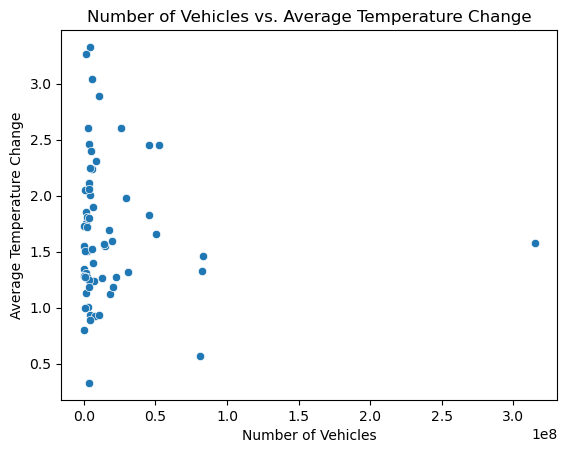

In [129]:
sns.scatterplot(data = final_df, x = "Total_Number_of_Vehicles", y = "Average_Temperature",)
plt.title("Number of Vehicles vs. Average Temperature Change")
plt.xlabel("Number of Vehicles")
plt.ylabel("Average Temperature Change")
plt.show()

In [130]:
# Creates a copy of the original dataframe
filtered_df = final_df.copy()

In [131]:
# Creates a new column giving the log values of the Vehicles column
filtered_df["Log_Vehicles"] = np.log10(final_df["Total_Number_of_Vehicles"])

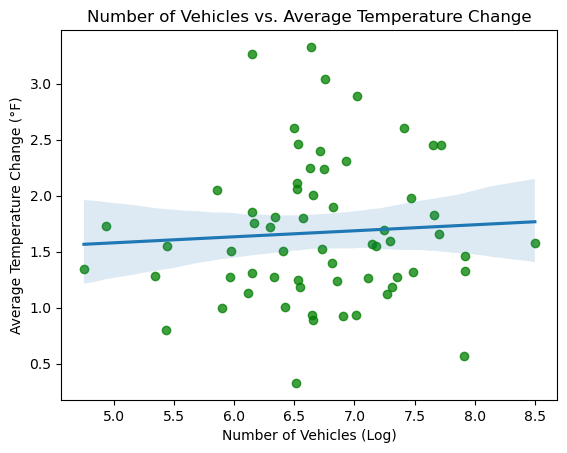

In [132]:
sns.regplot(data = filtered_df, x = "Log_Vehicles", y = "Average_Temperature", scatter_kws = {"alpha": 0.75, "color": "green"})
plt.title("Number of Vehicles vs. Average Temperature Change")
plt.xlabel("Number of Vehicles (Log)")
plt.ylabel("Average Temperature Change (°F)")

plt.show()

The relationship between the two variables is easier to visualize when the log of the Number of Vehicles is taken. This is because those numbers are exceptionally large.

## Visualization 2: Total Emissions versus Number of Vehicles 

#### (Milestone 3 vs Milestone 2)

#### Scatter Plot

In [133]:
# Creates a new column giving the log values of the Emissions column
filtered_df["Log_Emissions"] = np.log10(final_df["Total_Emissions"] + 1e-10)

C:\Users\megme\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


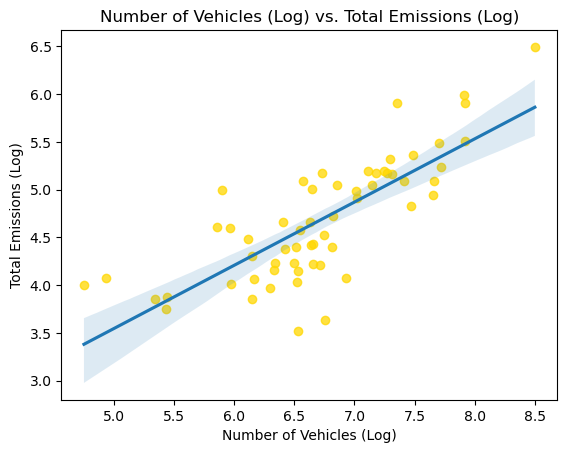

In [134]:
sns.regplot(data = filtered_df, x = "Log_Vehicles", y = "Log_Emissions", scatter_kws = {"alpha": 0.75, "color": "gold"})
plt.title("Number of Vehicles (Log) vs. Total Emissions (Log)")
plt.xlabel("Number of Vehicles (Log)")
plt.ylabel("Total Emissions (Log)")
plt.show()

This scatterplot shows that there is a possible correlation between the number of vehicles and the total emissions output.

## Visualization 3: Percentage of countries that share data between years

#### (Milestone 2 vs Milestone 3)

#### Pie Chart

In [135]:
 # Converts the years columns to string type
final_df["Year_Carbon"] = final_df["Year_Carbon"].astype(str).str.strip()
final_df["Year_Vehicles"] = final_df["Year_Vehicles"].astype(str).str.strip()
final_df["Year_Recorded"] = final_df["Year_Recorded"].astype(str).str.strip()

In [136]:
# Concatenates the columns
year_count = pd.concat([final_df["Year_Carbon"], final_df["Year_Vehicles"], final_df["Year_Recorded"]])
# Finds only the unique years
unique_years = year_count.unique()
print(unique_years)

['2020' '2022' '2021' '2019' '2023']


In [137]:
# Counts the number of time each value occurs
year_counts = year_count.value_counts()

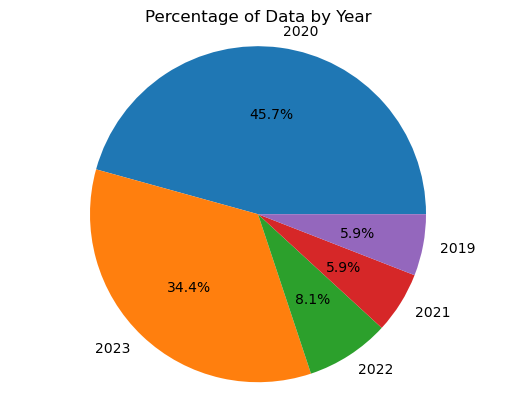

In [138]:
# Plots a pie chart
# Uses the year_counts values to determine the percentages of the pie
# Labels the slices according to the year
# Sets the percentage display to 1 decimal place
plt.pie(year_counts, labels = year_counts.index, autopct = "%1.1f%%")
plt.title("Percentage of Data by Year")
plt.axis("equal")
plt.show()

## Visualization 4: Total Population and Particulate Matter < 25 Microns by Country

#### *Top 5 most populous countries only*

#### (Milestone 2 vs Milestone 4)

#### Horizontal Bar Chart

In [139]:
top_5 = final_df.nlargest(5, "Total_Population")[["Country", "Total_Population"]]
print(top_5)

      Country  Total_Population
10      China      1.456928e+09
25      India      1.396387e+09
26  Indonesia      2.718580e+08
6      Brazil      2.131963e+08
40    Nigeria      2.083274e+08


In [140]:
merged_subset = pd.merge(top_5, final_df[["Country", "PM_25"]], on = "Country")

In [141]:
# Creates a new column giving the log values of the Total Population column
merged_subset["Log_TotalPop"] = np.log10(merged_subset["Total_Population"])

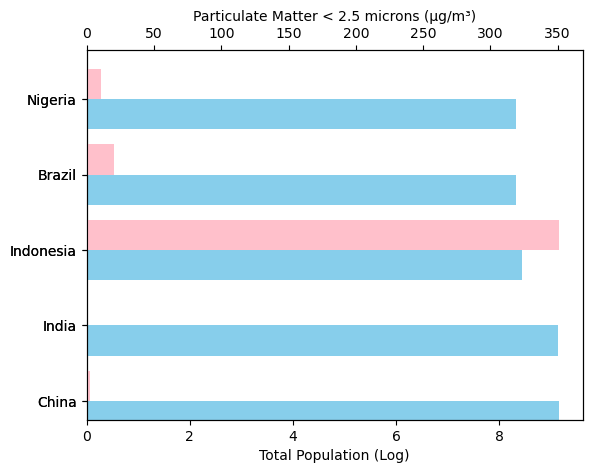

In [142]:
# Creates a plot figure
fig = plt.figure()

# Adds an axis subplot 
ax = fig.add_subplot()

# Creates a second axis that shares the y-axis with the first subplot
ax2 = ax.twiny()

# Sets the width of the bars
width = 0.4

# Creates the horizontal bar plot for Log_TotalPop on the first axis
# Aligns the bars on the right side of the horizontal axis tick marks
merged_subset["Log_TotalPop"].plot(kind = "barh", color = "skyblue", ax = ax, width = width, position = 1)

# Creates the horizontal bar plot for PM_25
# Aligns the bars on the left side of the horizontal axis
merged_subset["PM_25"].plot(kind = "barh", color = "pink", ax = ax2, width = width, position = 0)

# Sets the x-axes labels
ax.set_xlabel("Total Population (Log)")
ax2.set_xlabel("Particulate Matter < 2.5 microns (µg/m³)")

# Sets the y-axis labels
ax.set_yticklabels(merged_subset["Country"])

plt.show()

## Visualization 5: Average Temperature and Actual Temperature by Country

#### (Milestones 2, 4)

#### Line Graph

In [143]:
# Finds the top 10 hottest countries
top_10= final_df.nlargest(10, "Temperature")[["Country", "Temperature"]]
print(top_10)

       Country  Temperature
5       Belize   103.689655
6       Brazil   103.624555
13     Ecuador   101.619413
10       China    92.035714
50      Rwanda    91.866667
25       India    91.172414
44        Peru    90.409229
4   Bangladesh    89.833333
40     Nigeria    88.500000
11    Colombia    87.575623


In [144]:
# Finds the top 10 coldest countries
bottom_10 = final_df.nsmallest(10, "Temperature")[["Country", "Temperature"]]
print(bottom_10)

         Country  Temperature
60       Ukraine    17.595833
57   Switzerland    20.319280
2        Austria    21.530474
58      Thailand    26.337107
53  South Africa    29.435447
7       Bulgaria    35.508815
36      Mongolia    40.996716
39   New Zealand    52.096464
24       Iceland    53.047619
20         Ghana    56.972055


In [145]:
# Merges the top 10 hottest dataframe with data from the final_df
top_subset = pd.merge(top_10, final_df[["Country", "Average_Temperature"]], on = "Country")

In [146]:
# Merges the top 10 coldest dataframe with data from the final_df
bottom_subset = pd.merge(bottom_10, final_df[["Country", "Average_Temperature"]], on = "Country")

In [147]:
# Concatenates both dataframes
heat_subset = pd.concat([top_subset, bottom_subset])

# Orders the dataframe by Temperature
heat_subset = heat_subset.sort_values(by = "Temperature")
print(heat_subset)

        Country  Temperature  Average_Temperature
0       Ukraine    17.595833             2.893917
1   Switzerland    20.319280             2.401750
2       Austria    21.530474             2.241667
3      Thailand    26.337107             1.598583
4  South Africa    29.435447             0.937833
5      Bulgaria    35.508815             2.111000
6      Mongolia    40.996716             2.048000
7   New Zealand    52.096464             0.886667
8       Iceland    53.047619             0.797917
9         Ghana    56.972055             1.310500
9      Colombia    87.575623             1.546250
8       Nigeria    88.500000             1.267500
7    Bangladesh    89.833333             0.932083
6          Peru    90.409229             1.796667
5         India    91.172414             0.568500
4        Rwanda    91.866667             1.280639
3         China    92.035714             1.574000
2       Ecuador   101.619413             1.503750
1        Brazil   103.624555             1.459250


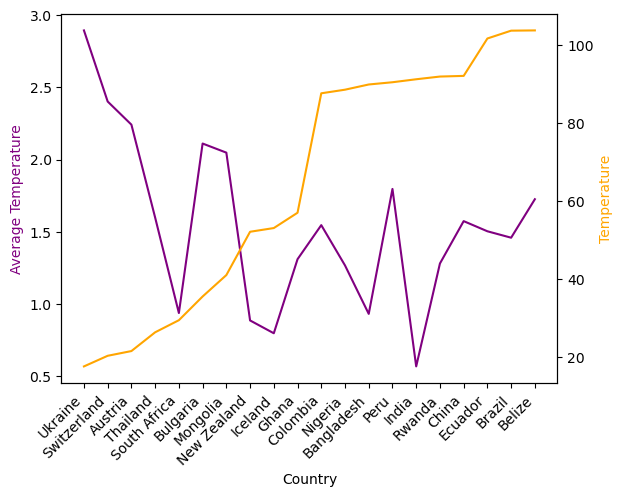

In [148]:
fig, ax = plt.subplots()

# Creates the plot for average temperature and country
ax.plot(heat_subset["Country"], heat_subset["Average_Temperature"], color = "purple", label = "Avg Temp Change")

# Sets the labels
ax.set_xlabel("Country")
ax.set_ylabel("Average Temperature", color = "purple")

# Creates an axis for another subplot that shares the same x-axis
ax2 = ax.twinx()

# Plots the second axis
ax2.plot(heat_subset["Country"], heat_subset["Temperature"], color = "orange", label = "Temperature")

# Sets the second y-axis label
ax2.set_ylabel("Temperature", color = "orange")

# Sets the x-ticks to match the data for "Country"
ax.set_xticks(range(len(heat_subset["Country"])))

# Rotates and aligns the x-axis labels
ax.set_xticklabels(heat_subset["Country"], rotation = 45, ha = "right")

plt.show()

## Summary

#### Ethical Implications

There were many ethical implications that came from the cleansing steps in my data. For example, it appears that temperatures reflected in the API data are a mix of unit measurement between Farenheit and Celsius. The years across datasets did not necessarily line up, so information was compared across a country, but not the year. Both of these could lead to incorrect conclusions being drawn about the data. Countries could appear to have greatly improved or worsened their particulate matter measurements because the years are not comparable. 

In the final visualization I chose to only show the top hottest countries and the top coldest countries. This created a large uptick in the middle of the graph as it jumped between the two lists. This is also where the difference in measurements becomes apparent because South Africa is in the list of the coldest countries and that is likely not true.

The data as it is serves the function of this project, but should not ever be published for any kind of public use. It would require each dataset to be more thoroughly cleaned and the data would have to be aligned by years to more accurately represent any trends.

#### Summary

I learned a lot from this course. I can see now how the data cleaning step can happen repeatedly over a project. I thought my data was clean enough to do the visualizations, but quickly discovered more could be done to make it easier and more accurate.

I also learned that it requires extensive cleaning to ensure the data is accurately represented. I didn't think I would have the many potential ethical implications, but the further into the project I got the more came to light.

I like for things to be neat and tidy so I actually enjoyed cleaning the data and finding more ways to make it more efficient. I can see, though, how this task could become tedious and how it could easily lead to data being misrepresented. I can see the value in a structured approach to data cleaning so that all the data is treated equally.

I also had fun creating the visualizations. There were several things I wanted to do that I just didn't have time to figure out. 

The scope of my project also changed between the first and the last milestones. Originally I wanted to look at carbon emissions and variables that might affect those numbers across all three datasets. While the information might be there with the sources I used, I would need more background knowledge on what each dataset means. This was especially true for the information gleaned from the API.

Overall I really enjoyed this class. It gave me methods for data cleaning that I didn't have before. I also now appreciate that I have a lot to learn still but I am excited to dive in.